# When heteroskedasticity becomes problematic
# &
# How to fix it with variances

In this version, I made a mistake when constructing the W matrix. If we multiply a random variable `x`, whose standard deviation is `𝜎`, with a constant `a`, the resulting random variable `ax` will have a standard deviation that is `a𝜎`. Therefore, we want the values in the W matrix to be 𝜎^(-1) rather than 𝜎^(-1/2). See the two blocks under "Case 1: false positive" prepared for Neuro meeting.

Author: Chenyu

Date: Mar 29, 2023


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Set the random seed to make the results reproducible
np.random.seed(0)

def generate_random_values(distribution='normal', mu=50, sigma=20, low=0, high=100, size=1000):
    """
    Generate a random variable from a specified distribution.

    Args:
        distribution (str): The name of the distribution to generate from.
        
    Returns:
        A random variable generated from the specified distribution.
    """

    if distribution == 'normal':
        values = np.random.normal(mu, sigma, size)
    elif distribution == 'uniform':
        values = np.random.uniform(low, high, size)
    elif distribution == 'exponential':
        values = np.random.exponential(scale=1/mu, size=size)
    elif distribution == 'poisson':
        values = np.random.poisson(mu, size)
    else:
        print('Invalid distribution specified.')
    return values


### homoskedastitic, small sigma, same slope, no group effects

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3899.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:34:23   Log-Likelihood:                -6027.3
No. Observations:                2000   AIC:                         1.206e+04
Df Residuals:                    1997   BIC:                         1.208e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0494      0.374     26.874      0.0

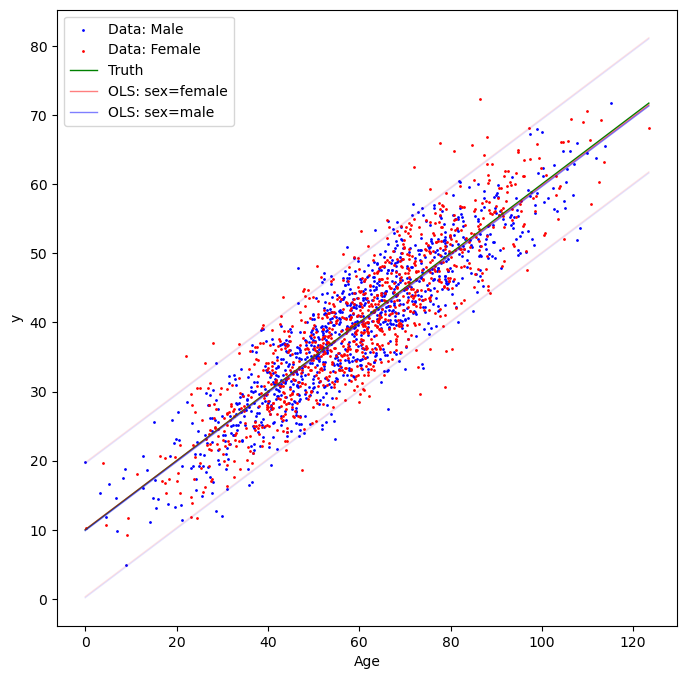

In [2]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = generate_random_values(distribution='normal', mu=0, sigma=5, size=2000)  # (2000,)
# y - truth
y = 10 + 0.5*age + noise

# Create the input matrix X
X = np.column_stack((age, sex))
X = sm.add_constant(X)

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")

# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
ax.plot(x, iv_u, alpha= 0.1, color='r', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='r', linestyle='-', linewidth=1)
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")
ax.plot(x, iv_u, alpha= 0.1, color='b', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='b', linestyle='-', linewidth=1)


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

### homoskedastitic, large sigma, same slope, no group effects


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     48.61
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.45e-21
Time:                        16:39:01   Log-Likelihood:                -10648.
No. Observations:                2000   AIC:                         2.130e+04
Df Residuals:                    1997   BIC:                         2.132e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5779      3.694      1.510      0.1

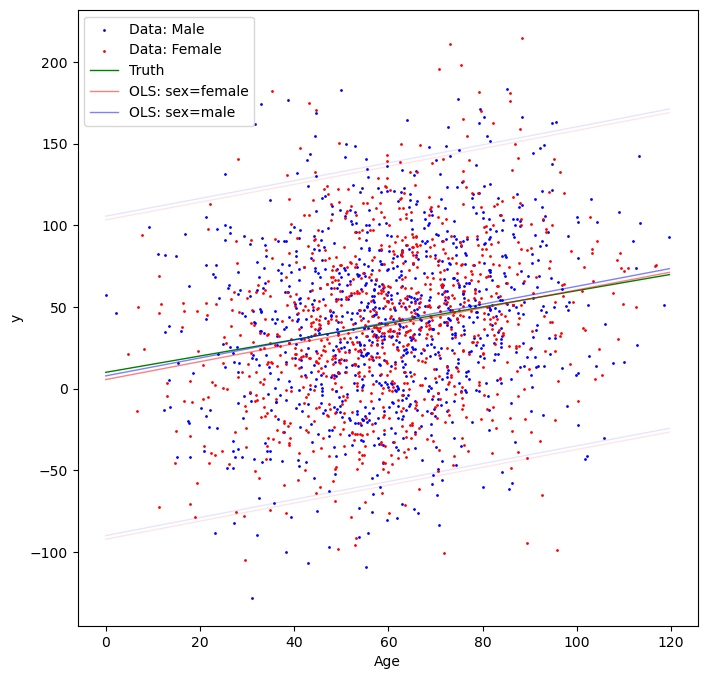

In [3]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = generate_random_values(distribution='normal', mu=0, sigma=50, size=2000)  # (2000,)
# y - truth
y = 10 + 0.5*age + noise

# Create the input matrix X
X = np.column_stack((age, sex))
X = sm.add_constant(X)

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")

# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
ax.plot(x, iv_u, alpha= 0.1, color='r', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='r', linestyle='-', linewidth=1)
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")
ax.plot(x, iv_u, alpha= 0.1, color='b', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='b', linestyle='-', linewidth=1)


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

### heteroskedastic, same sigma-age relation for male and female

age ~ normal

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           6.00e-55
Time:                        16:39:16   Log-Likelihood:                -9634.1
No. Observations:                2000   AIC:                         1.927e+04
Df Residuals:                    1997   BIC:                         1.929e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6437      2.225      2.536      0.0

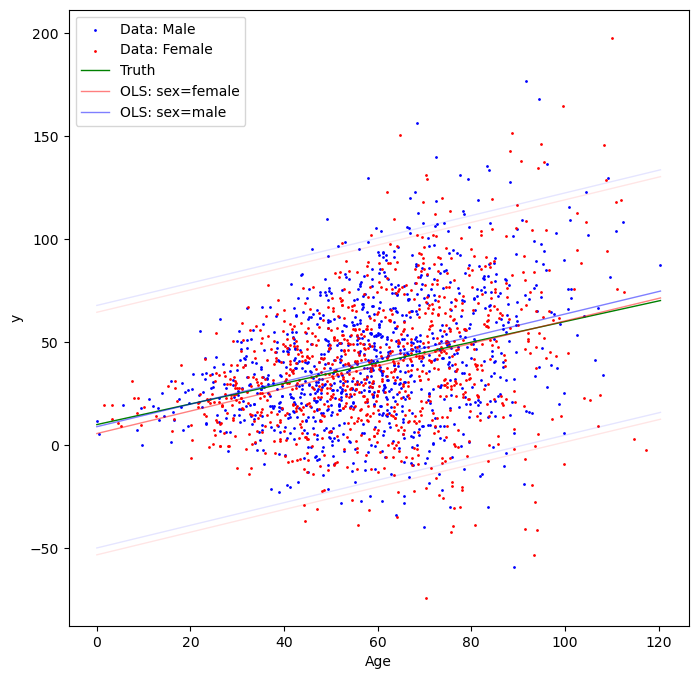

In [4]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    noise[i] = np.random.normal(loc=0, scale=5+0.4*a)

# y - truth
y = 10 + 0.5*age + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")

# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
ax.plot(x, iv_u, alpha= 0.1, color='r', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='r', linestyle='-', linewidth=1)
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")
ax.plot(x, iv_u, alpha= 0.1, color='b', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='b', linestyle='-', linewidth=1)


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

age ~ uniform distribution

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     299.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          1.25e-114
Time:                        16:39:22   Log-Likelihood:                -9731.3
No. Observations:                2000   AIC:                         1.947e+04
Df Residuals:                    1997   BIC:                         1.949e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8292      1.557      6.953      0.0

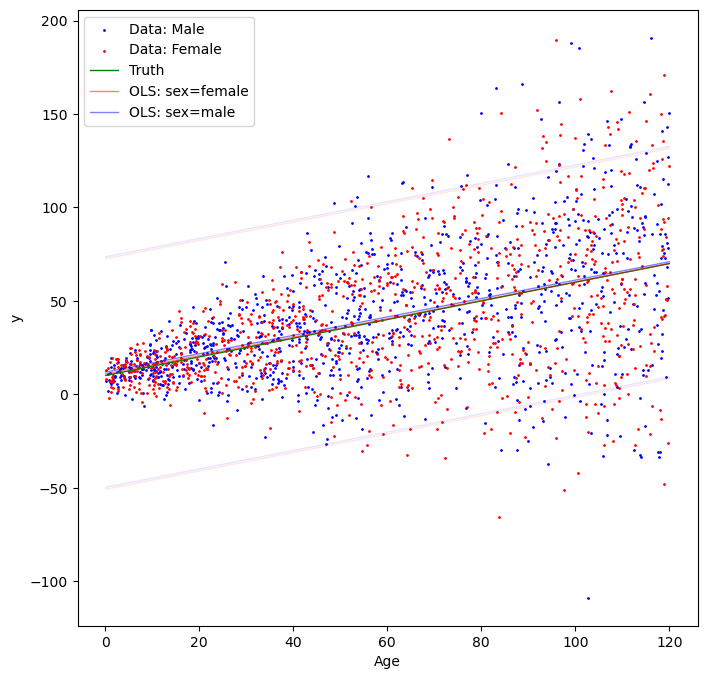

In [5]:
# Construct X matrix
# Age - same uniform distribution
age_male = np.random.uniform(low=0, high=120, size=1000)
age_male[age_male<0] = 0
age_female = np.random.uniform(low=0, high=120, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    noise[i] = np.random.normal(loc=0, scale=5+0.4*a)

# y - truth
y = 10 + 0.5*age + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")

# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
ax.plot(x, iv_u, alpha= 0.1, color='r', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='r', linestyle='-', linewidth=1)
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")
ax.plot(x, iv_u, alpha= 0.1, color='b', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='b', linestyle='-', linewidth=1)


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

### heteroskedastic, different sigma-age relation for male and female, no sex difference

age ~ normal

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     35.02
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.12e-15
Time:                        16:40:09   Log-Likelihood:                -10628.
No. Observations:                2000   AIC:                         2.126e+04
Df Residuals:                    1997   BIC:                         2.128e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7801      3.660      3.765      0.0

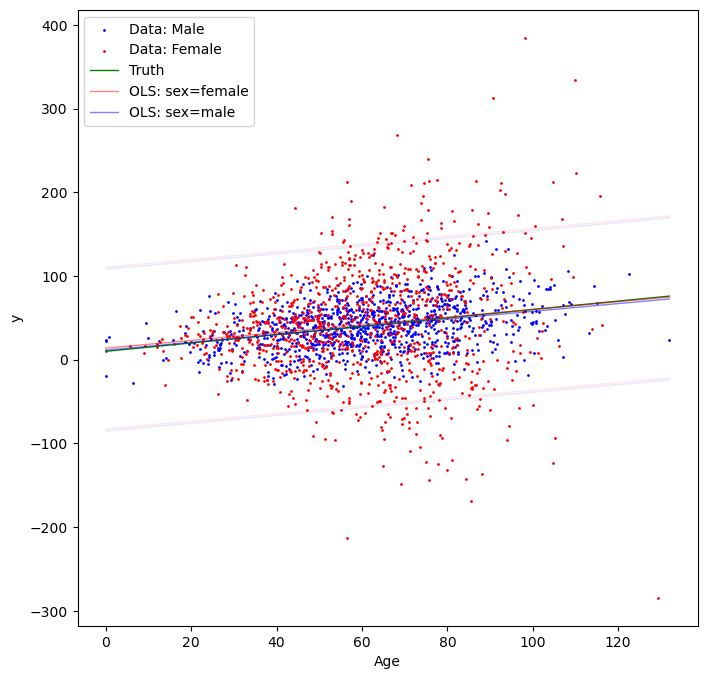

In [6]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=0+1*a)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=20+0.1*a)
# y - truth
y = 10 + 0.5*age + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")

# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
ax.plot(x, iv_u, alpha= 0.1, color='r', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='r', linestyle='-', linewidth=1)
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")
ax.plot(x, iv_u, alpha= 0.1, color='b', linestyle='-', linewidth=1)
ax.plot(x, iv_l, alpha= 0.1, color='b', linestyle='-', linewidth=1)


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     453.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          3.52e-163
Time:                        16:42:23   Log-Likelihood:                -10181.
No. Observations:                2000   AIC:                         2.037e+04
Df Residuals:                    1997   BIC:                         2.039e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7907      2.898      4.414      0.0

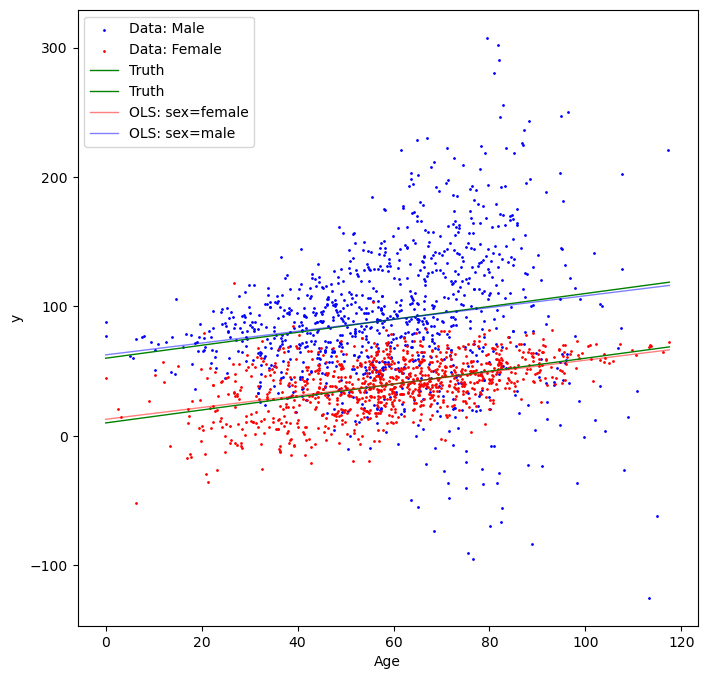

In [14]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female))  # (2000,)
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))  # (2000,)
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=30-0.2*a)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=10+0.01*a**2)
# y - truth
y = 10 + 0.5*age + 50*sex + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     170.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.57e-69
Time:                        16:42:34   Log-Likelihood:                -11116.
No. Observations:                2000   AIC:                         2.224e+04
Df Residuals:                    1997   BIC:                         2.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3190      4.720      2.610      0.0

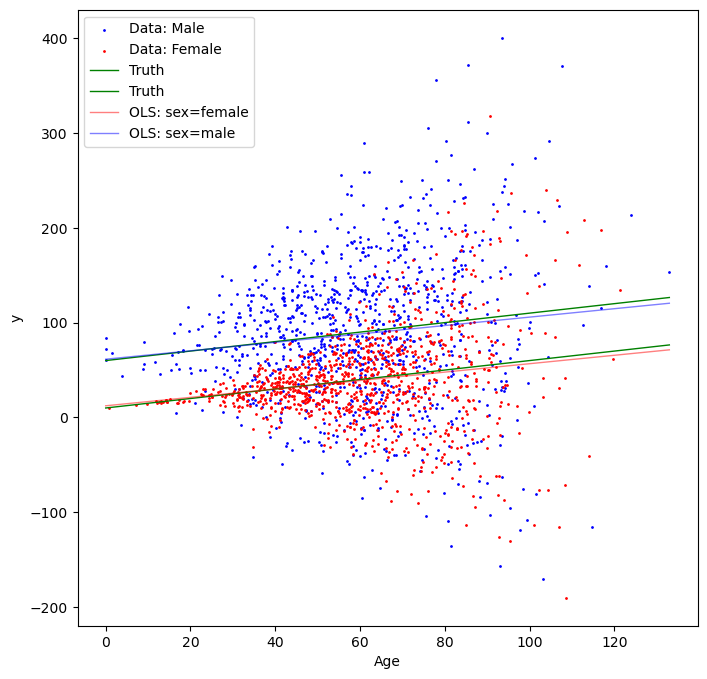

In [15]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=60, scale=20, size=1000)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=1000)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female)) 
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=0.01* a**2)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=10+a)
# y - truth
y = 10 + 0.5*age + 50*sex + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:1000], y[:1000], s=1, c='b', label='Data: Male')
ax.scatter(age[1000:], y[1000:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

## When we have less observations, and different age distributions


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     398.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           6.08e-70
Time:                        22:28:53   Log-Likelihood:                -739.46
No. Observations:                 200   AIC:                             1485.
Df Residuals:                     197   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2966      2.651      4.639      0.0

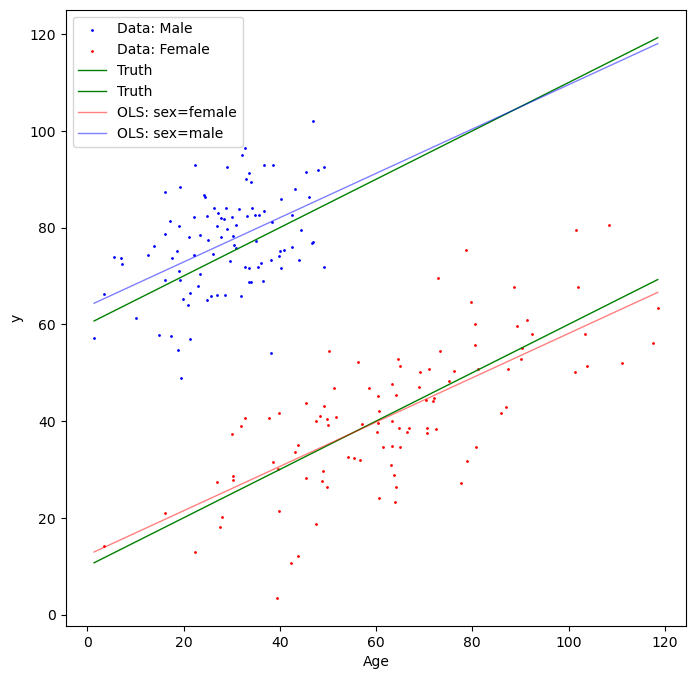

In [237]:
# Construct X matrix
# Age - same normal distribution
age_male = np.random.normal(loc=30, scale=10, size=100)
age_male[age_male<0] = 0
age_female = np.random.normal(loc=60, scale=20, size=100)
age_female[age_female<0] = 0
age = np.concatenate((age_male, age_female)) 
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
# Noise
noise = np.zeros_like(age)
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=10)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=10)
# y - truth
y = 10 + 0.5*age + 50*sex + noise

# Create the input matrix X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(y,X).fit()

# PLOT
fig, ax = plt.subplots(1,1, figsize=(8,8))

# data
ax.scatter(age[:100], y[:100], s=1, c='b', label='Data: Male')
ax.scatter(age[100:], y[100:], s=1, c ='r', label='Data: Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
ax.plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
y = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
ax.plot(x, y, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")


ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('y')
print(results.summary())

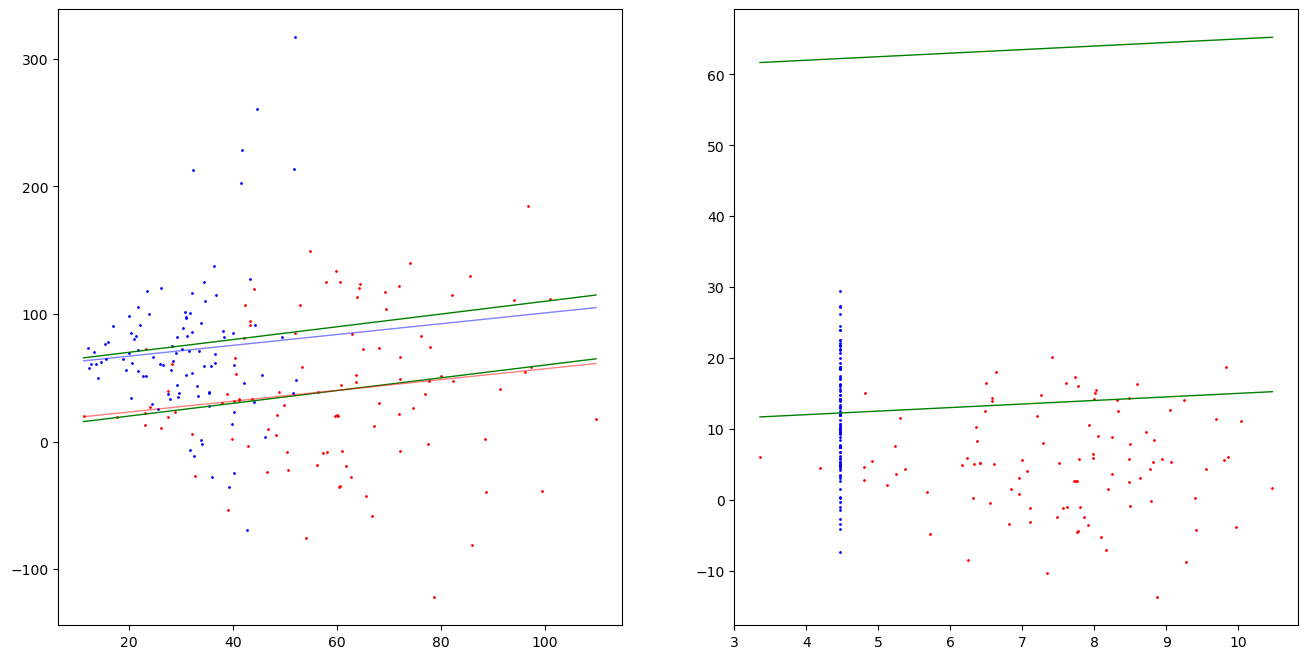

In [11]:
# Generate Data
# Age
age_male = np.random.normal(loc=30, scale=10, size=100)
age_male[age_male<=0] = 0.001
age_female = np.random.normal(loc=60, scale=20, size=100)
age_female[age_female<=0] = 0.001
age = np.concatenate((age_male, age_female)) 
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
# Noise, sigma, W
noise = np.zeros_like(age)
W = np.zeros((age.shape[0], age.shape[0]))
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=a)
        W[i,i] = a**(-0.5)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=0.05*a**2)
        W[i,i] = (0.05*a**2)**(-0.5)

# Y
Y = 10 + 0.5*age + 50*sex + noise

# X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(Y,X).fit()

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
axes[0].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
axes[0].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
Y_pred = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
Y_pred = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")


#######
# Linear regression with whitenning
WY = np.matmul(W, Y)
WX = np.matmul(W, X)
results_w = sm.OLS(WY, WX).fit()

axes[1].scatter(WX[:100,1], WY[:100], s=1, c = 'b', label='Male')
axes[1].scatter(WX[100:,1], WY[100:], s=1, c = 'r', label='Female')

# truth
x = np.linspace(start=np.min(WX[:,1]), stop=np.max(WX[:,1]),num=100)
y_true = 10 + 0.5 * x
axes[1].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
axes[1].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# # regression
# # female-only
# X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
# Y_pred = results.predict(X_test)
# prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
# axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# # male-only
# X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
# Y_pred = results.predict(X_test)
# prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
# axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")



# axes[0].legend(loc='best')
# axes[0].set_xlabel('Age')
# axes[0].set_ylabel('y')
# print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.37
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.57e-10
Time:                        23:34:43   Log-Likelihood:                -1104.2
No. Observations:                 200   AIC:                             2214.
Df Residuals:                     197   BIC:                             2224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7778     16.467      1.322      0.1

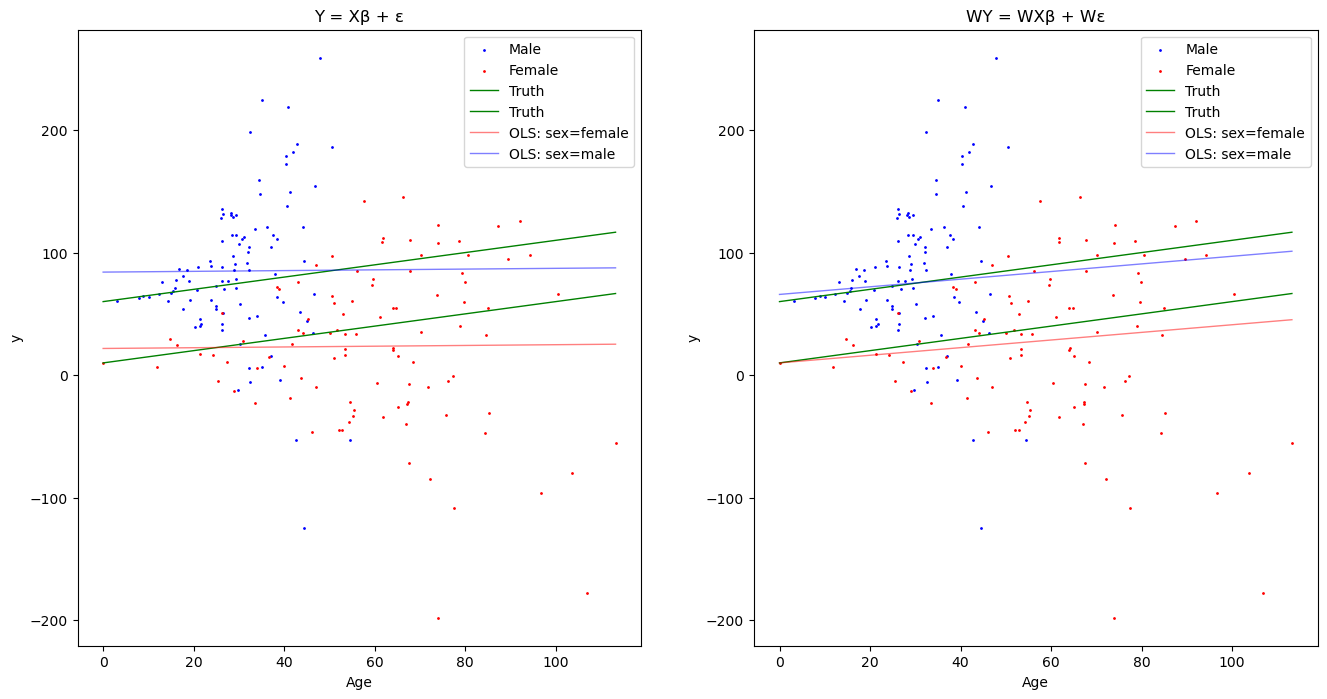

In [65]:
# Generate Data
# Age
age_male = np.random.normal(loc=30, scale=10, size=100)
age_male[age_male<=0] = 0.001
age_female = np.random.normal(loc=60, scale=20, size=100)
age_female[age_female<=0] = 0.001
age = np.concatenate((age_male, age_female)) 
# Sex
sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
# Noise, sigma, W
noise = np.zeros_like(age)
W = np.zeros((age.shape[0], age.shape[0]))
for i,a in enumerate(age):
    if sex[i]==0:
        noise[i] = np.random.normal(loc=0, scale=a)
        W[i,i] = a**(-0.5)
    elif sex[i]==1:
        noise[i] = np.random.normal(loc=0, scale=0.05*a**2)
        W[i,i] = (0.05*a**2)**(-0.5)

# Y
Y = 10 + 0.5*age + 50*sex + noise

# X
X = np.column_stack((np.ones_like(age), age, sex))

# Linear regression
results = sm.OLS(Y,X).fit()

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
axes[0].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
axes[0].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
Y_pred = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
Y_pred = results.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")

axes[0].legend(loc='best')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('y')
axes[0].set_title('Y = Xβ + ε')
print(results.summary())
#######
# Linear regression with whitenning
WY = np.matmul(W, Y)
WX = np.matmul(W, X)
results_w = sm.OLS(WY, WX).fit()

axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

# truth
x = np.linspace(start=np.min(age), stop=np.max(age),num=100)
y_true = 10 + 0.5 * x
axes[1].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
y_true = 10 + 0.5 * x + 50
axes[1].plot(x, y_true, alpha = 1, color='g', linewidth=1, label="Truth")
# regression
# female-only
X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
Y_pred = results_w.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="OLS: sex=female")
# male-only
X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
Y_pred = results_w.predict(X_test)
prstd, iv_l, iv_u = wls_prediction_std(res=results, exog=X_test)
axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="OLS: sex=male")

axes[1].legend(loc='best')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('y')
axes[1].set_title('WY = WXβ + Wε')
print(results_w.summary())



## For Neuro's meeting

## Case 1: false positive


[0.17175506 0.00549839 0.79440429]
[0.26997335 0.00254788 0.36414777]


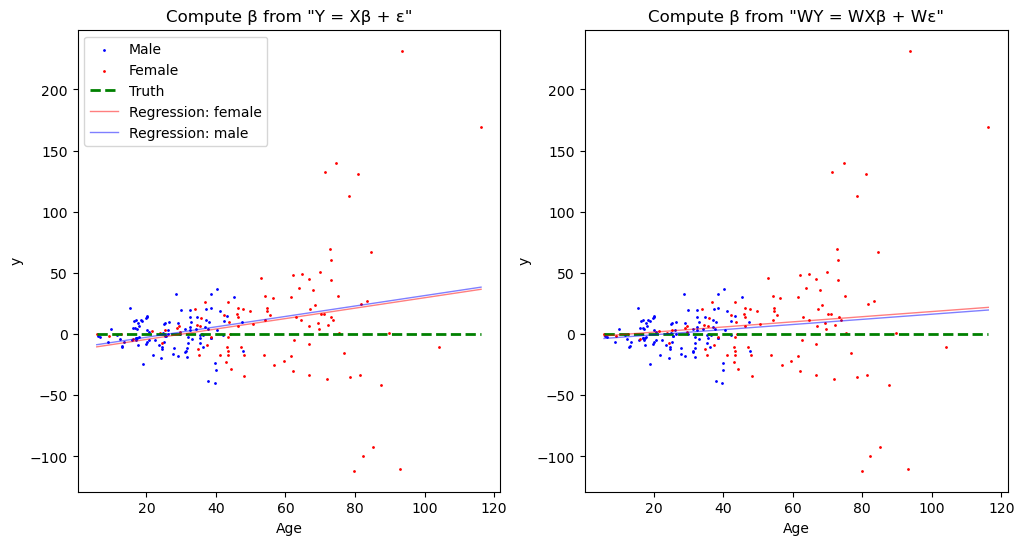

In [12]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=0.01*a**2)
            W[i,i] = (0.01*a**2)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=0.5*a)
            W[i,i] = (0.5*a)**(-0.5)

    # Linear regression
    Y = 0 + 0*age + 0*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[1] >0.05:
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true = 0 + 0 * x
    axes[0].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")
    axes[1].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break



[0.04759821 0.01138782 0.2883179 ]
[0.61830987 0.6185335  0.022017  ]


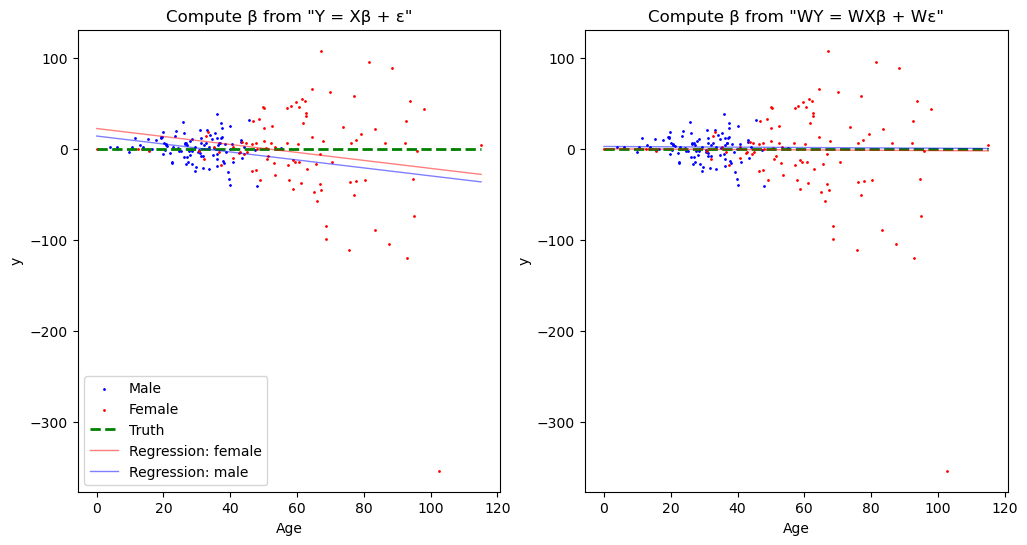

In [40]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=0.01*a**2)
            W[i,i] = (0.01*a**2)**(-1)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=0.5*a)
            W[i,i] = (0.5*a)**(-1)

    # Linear regression
    Y = 0 + 0*age + 0*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[1] >0.05:
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true = 0 + 0 * x
    axes[0].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")
    axes[1].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break



## Case 2: false negative

[0.02858784 0.97718597 0.20146528]
[0.10192995 0.28951818 0.50932645]


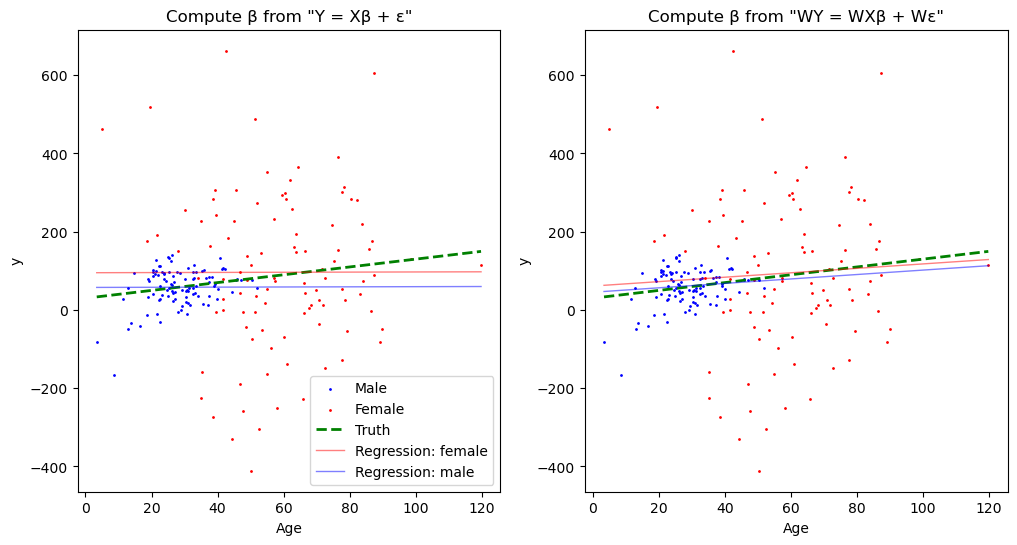

In [167]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=300-2*a)
            W[i,i] = (300-2*a)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=1000/(a+1))
            W[i,i] = (1000/(a+1))**(-0.5)

    # Linear regression
    Y = 30 + 1*age + 0*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[1] < 0.9:
        continue
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')
    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true = 30 + 1 * x
    axes[0].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")
    axes[1].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()


    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break



## Case 3: Group effects

[9.59295208e-01 5.31913939e-04 2.27761487e-02]
[6.16947423e-01 5.12180352e-05 1.09437564e-02]


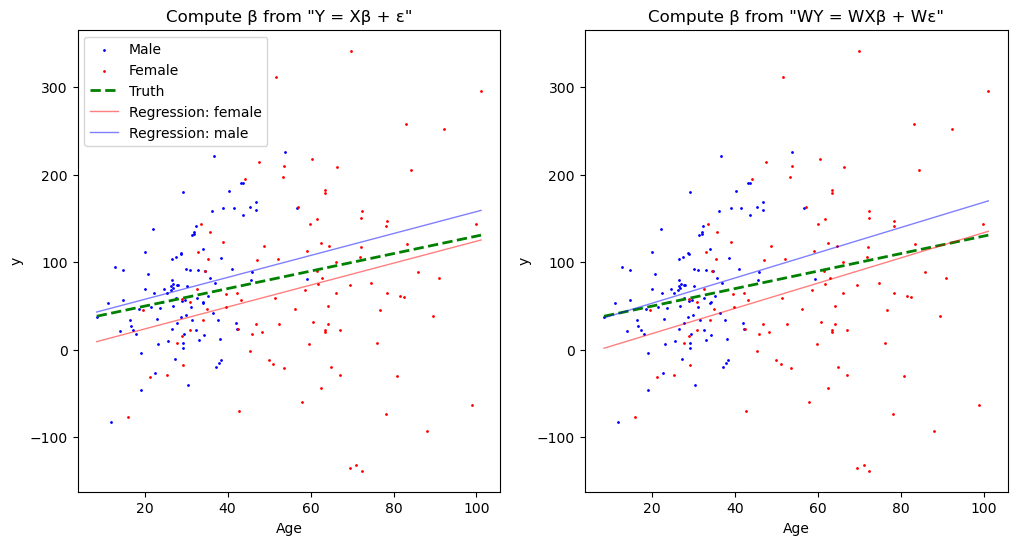

In [169]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=40+1*a)
            W[i,i] = (40+1*a)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=40+0.02*a**2)
            W[i,i] = (40+0.02*a**2)**(-0.5)

    # Linear regression
    Y = 30 + 1*age + 0*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[2] > 0.05:
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')
    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true = 30 + 1 * x
    axes[0].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")
    axes[1].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break

[0.02122477 0.00984339 0.97465274]
[0.00539848 0.0085562  0.96259207]


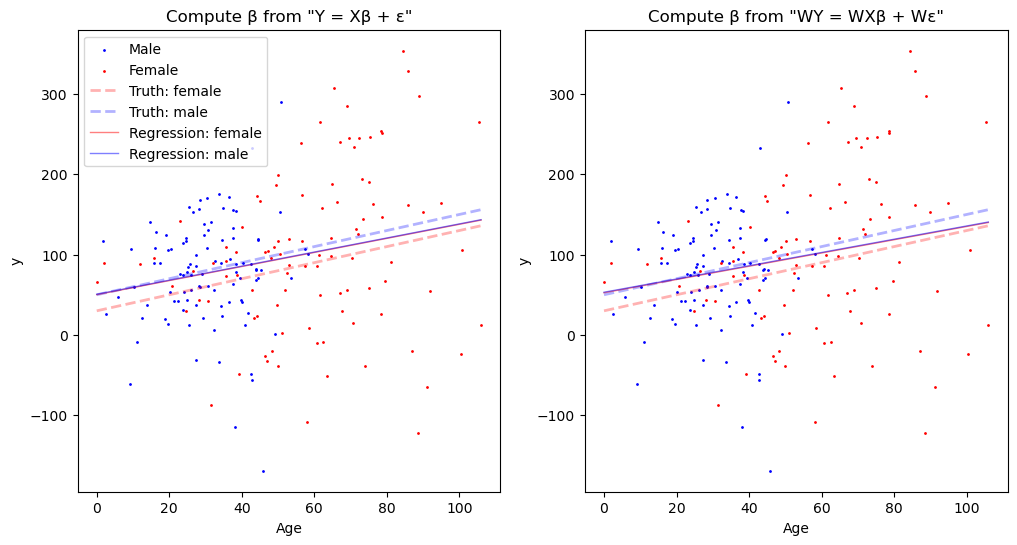

In [171]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=40+1*a)
            W[i,i] = (40+1*a)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=40+0.02*a**2)
            W[i,i] = (40+0.02*a**2)**(-0.5)

    # Linear regression
    Y = 30 + 1*age + 20*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[2] < 0.8:
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')
    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true_f = 30 + 1 * x
    y_true_m = 30 + 1 * x + 20
    axes[0].plot(x, y_true_f, alpha = 0.3, color='r', linestyle='--', linewidth=2, label="Truth: female")
    axes[0].plot(x, y_true_m, alpha = 0.3, color='b', linestyle='--', linewidth=2, label="Truth: male")
    axes[1].plot(x, y_true_f, alpha = 0.3, color='r', linestyle='--', linewidth=2, label="Truth: female")
    axes[1].plot(x, y_true_m, alpha = 0.3, color='b', linestyle='--', linewidth=2, label="Truth: male")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break

## Why is W only able to help correct the coefficient for age, but not able to help correct the coefficient for sex?

I set up the noise as age-sensitive. In other words, the sigma for the normal distribution that noise follows is a function of age. As I create the W matrix for whitenning (to make errors identically distributed), we "harmonize" the noise across age. But the noise across sex is beyond the capability of W.

## What if we want to see the power of W on adjusting the noise that are sex-dependent?


[4.42624383e-01 3.66777113e-07 2.67161432e-03]
[6.74000681e-01 6.32762516e-11 3.30046516e-04]


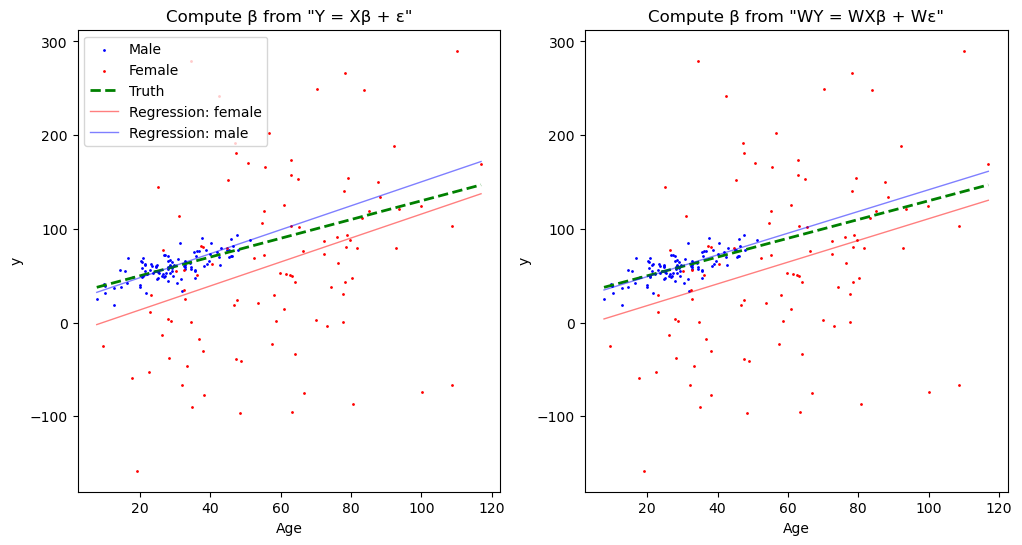

In [176]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=100)
            W[i,i] = (100)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=10)
            W[i,i] = (10)**(-0.5)

    # Linear regression
    Y = 30 + 1*age + 0*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    # if (results.pvalues[2] > 0.05) & (results.pvalues[1] > 0.05):
    if (results.pvalues[2] > 0.05):
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')
    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true = 30 + 1 * x
    axes[0].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")
    axes[1].plot(x, y_true, alpha = 1, color='g', linestyle='--', linewidth=2, label="Truth")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break


[5.39604903e-04 2.39082236e-01 8.96296626e-01]
[3.31006986e-03 3.29333819e-05 2.04804966e-01]


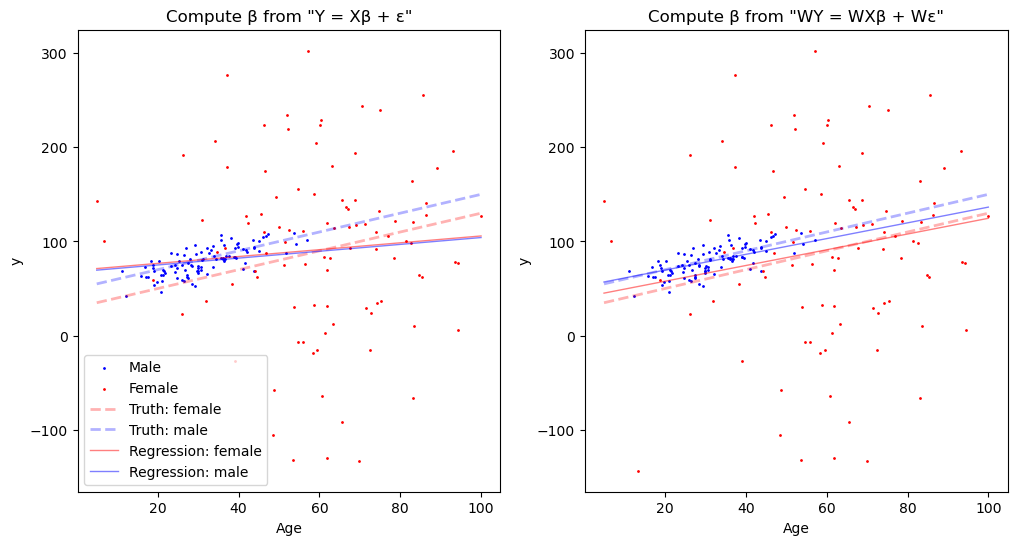

In [186]:
while(True):
    # Generate Data
    # Age
    age_male = np.random.normal(loc=30, scale=10, size=100)
    age_male[age_male<=0] = 0.001
    age_female = np.random.normal(loc=60, scale=20, size=100)
    age_female[age_female<=0] = 0.001
    age = np.concatenate((age_male, age_female)) 
    # Sex
    sex = np.concatenate((np.ones_like(age_male), np.zeros_like(age_female)))
    # Noise, sigma, W
    noise = np.zeros_like(age)
    W = np.zeros((age.shape[0], age.shape[0]))
    for i,a in enumerate(age):
        if sex[i]==0:
            # female
            noise[i] = np.random.normal(loc=0, scale=100)
            W[i,i] = (100)**(-0.5)
        elif sex[i]==1:
            # male
            noise[i] = np.random.normal(loc=0, scale=10)
            W[i,i] = (10)**(-0.5)

    # Linear regression
    Y = 30 + 1*age + 20*sex + noise
    X = np.column_stack((np.ones_like(age), age, sex))
    results = sm.OLS(Y,X).fit()
    if results.pvalues[2] < 0.8:
        continue

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    axes[0].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[0].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')
    axes[1].scatter(age[:100], Y[:100], s=1, c = 'b', label='Male')
    axes[1].scatter(age[100:], Y[100:], s=1, c = 'r', label='Female')

    # truth
    x = np.linspace(start=np.min(age), stop=np.max(age),num=10)
    y_true_f = 30 + 1 * x
    y_true_m = 30 + 1 * x + 20
    axes[0].plot(x, y_true_f, alpha = 0.3, color='r', linestyle='--', linewidth=2, label="Truth: female")
    axes[0].plot(x, y_true_m, alpha = 0.3, color='b', linestyle='--', linewidth=2, label="Truth: male")
    axes[1].plot(x, y_true_f, alpha = 0.3, color='r', linestyle='--', linewidth=2, label="Truth: female")
    axes[1].plot(x, y_true_m, alpha = 0.3, color='b', linestyle='--', linewidth=2, label="Truth: male")

    # regression
    # female
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results.predict(X_test)
    axes[0].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    axes[0].legend(loc='best')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('y')
    axes[0].set_title('Compute β from "Y = Xβ + ε"')
    print(results.pvalues)
    #######
    # Linear regression with whitenning
    WY = np.matmul(W, Y)
    WX = np.matmul(W, X)
    results_w = sm.OLS(WY, WX).fit()

    # regression
    # female-only
    X_test = np.column_stack((np.ones_like(x), x, np.zeros_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='r', linestyle='-', linewidth=1, label="Regression: female")
    # male-only
    X_test = np.column_stack((np.ones_like(x), x, np.ones_like(x)))
    Y_pred = results_w.predict(X_test)
    axes[1].plot(x, Y_pred, alpha= 0.5, color='b', linestyle='-', linewidth=1, label="Regression: male")

    # axes[1].legend(loc='best')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('y')
    axes[1].set_title('Compute β from "WY = WXβ + Wε"')
    print(results_w.pvalues)
    break